In [1]:
import numpy as np
from matplotlib import pyplot as pl

In [2]:
def kernel_f(x, xl, sigma, l):
    return sigma**2*np.exp(-.5 * (1/l**2) * (x-xl)**2)

In [3]:
def K(X, Xl, sigma, l):
    n, m = X.shape[0], Xl.shape[0]
    K = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            K[i,j] = kernel_f(X[i], Xl[j], sigma, l)
    return K    

In [74]:
def gaussian_fit_vec(X, X_new, Y, sigma):
    KXX = K(X, X, 1, 1)
    KXnX = K(X_new, X, 1, 1)
    KXXn = K(X, X_new, 1, 1)
    KXnXn = K(X_new, X_new, 1, 1)
    
    aux = KXnX.dot(np.linalg.inv(KXX+sigma**2*np.identity(KXX.shape[0])))
    print(np.multiply(sigma**2, np.identity(KXX.shape[0])))
    mean = aux.dot(Y)
    print(aux.dot(KXXn))
    print(sigma**2*np.identity(KXnXn.shape[0]))
    covariance = KXnXn + sigma**2*np.identity(KXnXn.shape[0]) - aux.dot(KXXn)

    return(mean, covariance)

In [75]:
X = np.linspace(-5, 5, 4)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = 4)
n = 1000
Xn = np.linspace(-5, 5, n)

In [76]:
mu, cov = gaussian_fit_vec(X, Xn, Y,0.1)

[[0.01 0.   0.   0.  ]
 [0.   0.01 0.   0.  ]
 [0.   0.   0.01 0.  ]
 [0.   0.   0.   0.01]]
[[ 9.90099011e-01  9.90049413e-01  9.89900625e-01 ... -4.42432737e-11
  -2.45782479e-11 -5.55237918e-12]
 [ 9.90049413e-01  9.89999835e-01  9.89851072e-01 ... -1.95847962e-10
  -1.08798454e-10 -2.45782479e-11]
 [ 9.89900625e-01  9.89851072e-01  9.89702349e-01 ... -3.52545676e-10
  -1.95847962e-10 -4.42432737e-11]
 ...
 [-4.42432737e-11 -1.95847962e-10 -3.52545676e-10 ...  9.89702349e-01
   9.89851072e-01  9.89900625e-01]
 [-2.45782479e-11 -1.08798454e-10 -1.95847962e-10 ...  9.89851072e-01
   9.89999835e-01  9.90049413e-01]
 [-5.55237918e-12 -2.45782479e-11 -4.42432737e-11 ...  9.89900625e-01
   9.90049413e-01  9.90099011e-01]]
[[0.01 0.   0.   ... 0.   0.   0.  ]
 [0.   0.01 0.   ... 0.   0.   0.  ]
 [0.   0.   0.01 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.01 0.   0.  ]
 [0.   0.   0.   ... 0.   0.01 0.  ]
 [0.   0.   0.   ... 0.   0.   0.01]]


In [77]:
stdv = np.sqrt(np.diag(cov))

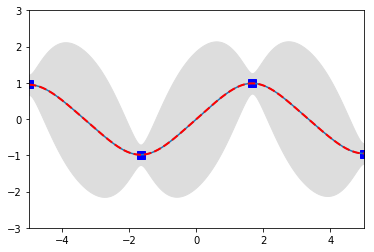

In [79]:
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, mu, label="Média")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Função aproximada")
pl.axis([-5, 5, -3, 3])
#pl.title('Three samples from the GP posterior')
#pl.legend()
pl.show()